STEP - 1 Import all the necessary libraries

In [261]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as  sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

STEP - 2 Acquire the Dataset
We will use the Titanic dataset from the Seaborn library.

In [262]:
# Load Titanic dataset

data = sns.load_dataset("titanic")

STEP - 3 Exploe the Data

In [263]:
# veiw the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [264]:

# Display the first few rows
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


STEP - 4
Data Cleaning and Preprocessing

a) Handling missing values

In [265]:
# Check for missing values
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [266]:
# Fill missing 'age' values with the median age
data['age'].fillna(data['age'].median(), inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_29388\892276284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [267]:
# Fill missing "embarked" with the most common port
data["embarked"]= data["embarked"].fillna(data["embarked"].mode()[0])

In [268]:
data = data.drop(["deck", "embark_town"], axis=1)

b) Encoding Categorical Variables : Convert text column into numerical format. male =0 female = 1

In [269]:
# Encode gender and embarked columns
data["sex"] = data["sex"].map({"male" : 0, "female" :1})
data["embarked"] = data["embarked"].map({"S":0,"C":1, "Q":2 })

c) Creating new features 
Family size : Combine sibsp(siblings/spouse) & parch(parents/children) to represent family size

In [270]:
data["family_size"] = data["sibsp"] + data["parch"]

Is alone  : A flag to determine if the passenger was alon

In [271]:
data["is_alone"] = (data["family_size"]==0).astype(int)

d) Drop Unnecessary Columns : Columns like name and tikcet don't add value for prediction, so we drop them.

In [272]:
data.drop(["name", "ticket"], axis=1, inplace=True, errors = "ignore")

STEP - 5
Splitting the Data into Train and Test Sets

In [273]:
data = pd.get_dummies(data, columns=['class', 'who', 'alive'], drop_first=True)

In [274]:
# Separate the features (X) and the target variable (y)
X = data.drop('survived', axis=1)
y = data["survived"]

In [275]:
# split the data(80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

STEP - 6
Exploratory Data Analysis (EDA)

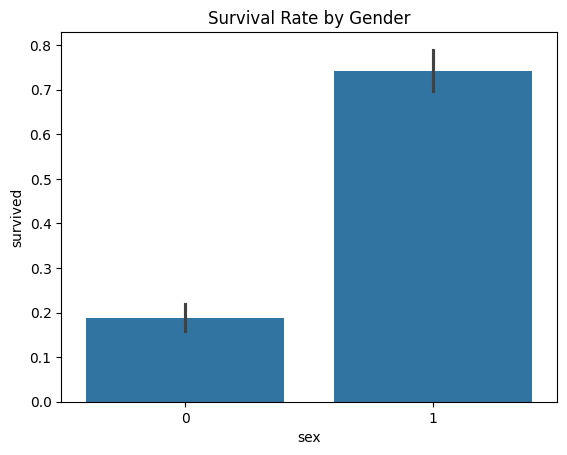

In [276]:
# Plot survival rate by gender
sns.barplot(x="sex", y="survived", data=data)
plt.title("Survival Rate by Gender")
plt.show()

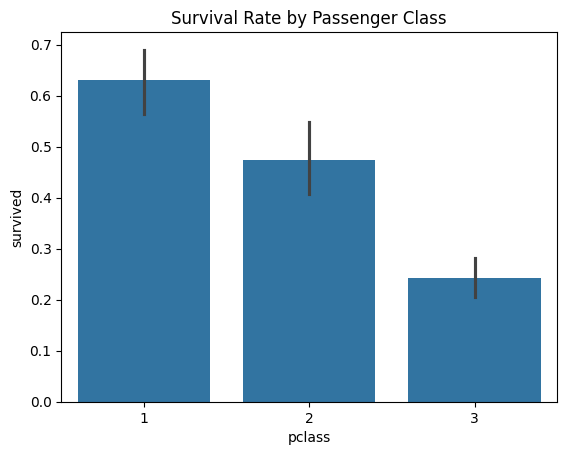

In [277]:
# Plot survival rate by passenger class
sns.barplot(x="pclass", y="survived", data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()

STEP - 7 Machine Learning Model

In [278]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make prediction on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy :{accuracy:.2f}')
print(f'precision :{precision:.2f}')
print(f'Recall :{recall:.2f}')
print(f'F1 Score :{f1:.2f}')

Accuracy :1.00
precision :1.00
Recall :1.00
F1 Score :1.00


Cross Validation Sore

In [279]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.2f}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.00


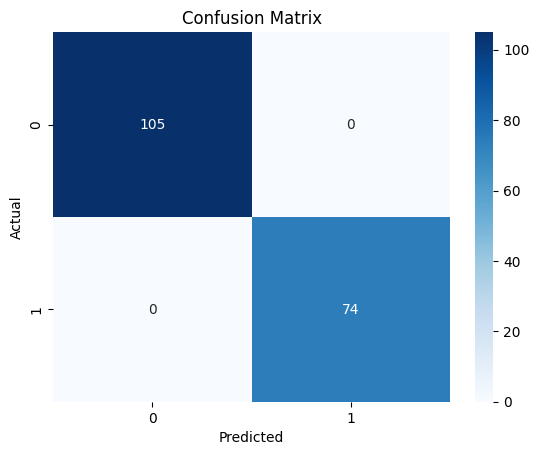

In [280]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Using RandomForestClassifier Models 

In [281]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make prediction and evaluates the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf=precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf=f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy:{accuracy_rf:.2f}")
print(f"Precision:{precision_rf:.2f}")
print(f"Recall:{recall_rf:.2f}")
print(f"F1 Score:{f1_rf:.2f}")

Random Forest Accuracy:1.00
Precision:1.00
Recall:1.00
F1 Score:1.00
